# 환경 세팅

## 한글 폰트 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,427 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

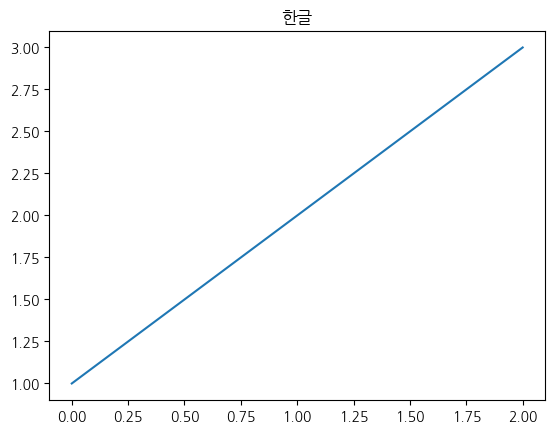

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 혼잡도 히트맵 (2호선 예시)

In [ ]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/세미프로젝트/data/'

df = pd.read_csv(DATA_PATH +'2호선_위치_혼잡도.csv')
df.head()

,호선,역이름,역코드,위도,경도,혼잡도
0,2,강변,214,37.535095,127.094681,16.7
1,2,잠실나루,215,37.520733,127.103790,22.1
2,2,잠실,216,37.513950,127.102234,14.9
3,2,잠실새내,217,37.511687,127.086162,18.5
4,2,종합운동장,218,37.510997,127.073642,18.4


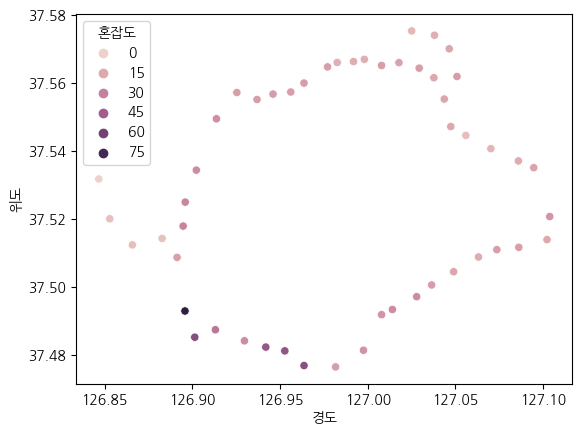

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=df, x='경도', y='위도', hue='혼잡도')
plt.savefig('seaborn_graph.png', transparent=True)

# 월별 평균 승객수 (2호선 예시)
- 3일전 데이터까지 업데이트되므로 월별이나 주별로 하는 것이 좋다고 판단

서울시 공공 데이터 API 활용: https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do

In [ ]:
import pandas as pd
import requests

key='6575747267786a7834386e57557271' # 인증키
re=requests.get(f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/1/999/20230101') # 접속확인
print(req.status)

subway=dict()
for i in range(1,32):
    if i <10:
        re=requests.get(f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/1/999/2023080{i}') ## 보고 싶은 월 (2023년08월)
        data=re.json()
        date='2023080'+str(i)
    else:
        re=requests.get(f'http://openapi.seoul.go.kr:8088/{key}/json/CardSubwayStatsNew/1/999/202308{i}')
        data=re.json()
        date='202308'+str(i)
    station=[]
    take_on=[]
    take_off=[]
    for v in data['CardSubwayStatsNew']['row']:
        if v['LINE_NUM']=='2호선': # 보고싶은 호선들 리스트에 넣어서 호출 하는 식으로 변경하면 됨
                station.append(v['SUB_STA_NM'])
                take_on.append(v['RIDE_PASGR_NUM'])
                take_off.append(v['ALIGHT_PASGR_NUM'])
    subway[date]=[
        {'station':station,'승차인원':take_on,'하차인원':take_off}
    ]

df=pd.DataFrame(index=subway['20230801'][0]['station'],columns=subway.keys())
for i in subway:
    for v in subway[i]:
        df[i]=v['승차인원']
ride=pd.DataFrame(df.mean(axis=1),columns=['평균 승차 승객 수'])

fd=pd.DataFrame(index=subway['20230801'][0]['station'],columns=subway.keys())
for i in subway:
    for v in subway[i]:
        fd[i]=v['하차인원']
off=pd.DataFrame(fd.mean(axis=1),columns=['평균 하차 승객 수'])

table=pd.merge(left=ride,right=off,how='inner',left_on=ride.index,right_on=off.index)
table=table.rename(columns={'key_0':'역명'})
table=table.sort_values(by='역명',ascending=True)

In [ ]:
table['평균 승차 승객 수']=table['평균 승차 승객 수'].astype(int)
table['평균 하차 승객 수']=table['평균 하차 승객 수'].astype(int)
top10_ride=table.sort_values(by='평균 승차 승객 수',ascending=False)
top10_off=table.sort_values(by='평균 하차 승객 수',ascending=False)

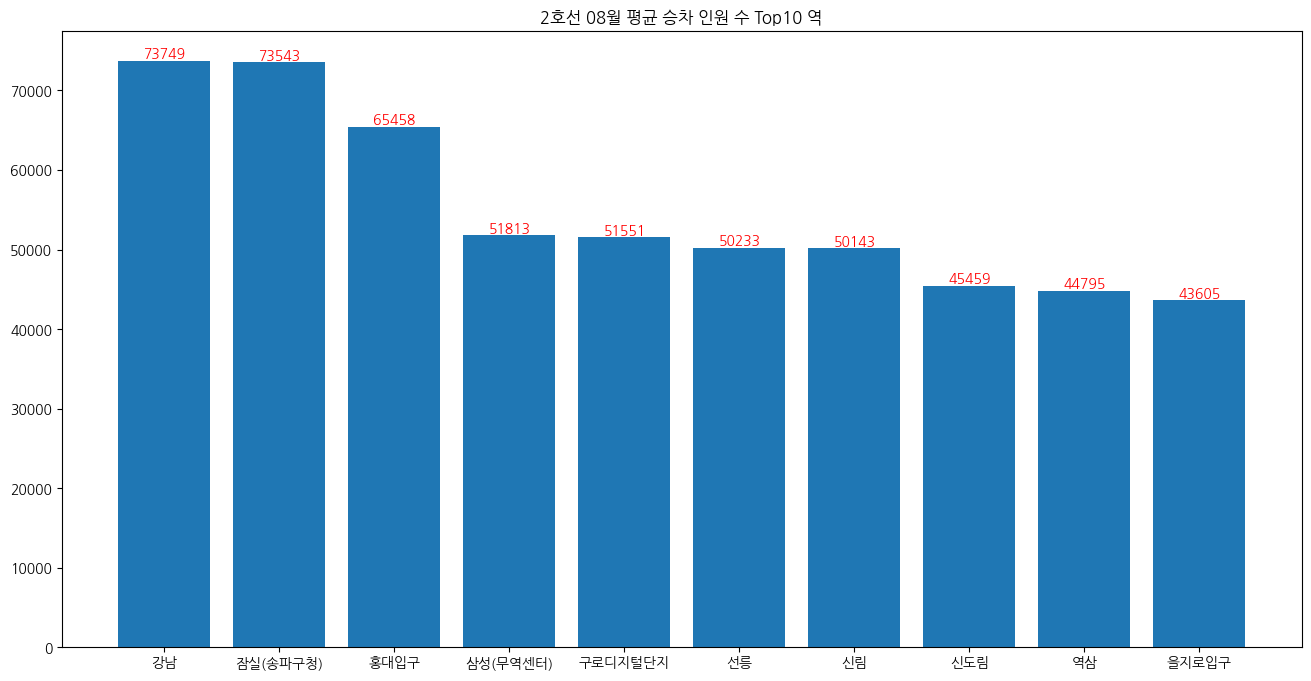

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "NanumGothic"
plt.figure(figsize=(16,8))

plt.bar(top10_ride['역명'][:10],top10_ride['평균 승차 승객 수'][:10])
for x,y in enumerate(list(top10_ride['평균 승차 승객 수'][:10])):
    plt.text(x, y, y, fontsize=10, color='#ff0000',
                    horizontalalignment='center', verticalalignment='bottom')
plt.title('2호선 08월 평균 승차 인원 수 Top10 역')
plt.show()

# 카카오 지도 API (아직 권한이 없음)
- 지도를 통한 시각화
- 지하철 위치 정보 따로 있어서 API 사용 안해도 되긴함
- 코드 구현중.......

In [ ]:
import re
table['역명']=table['역명'].apply(lambda x: re.sub(r'\([^)]*\)', '', x) if '(' in x else x)
table['역명']=table['역명'].apply(lambda x: x+'역')

x=[]
y=[]
for z in table['역명']:

    url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(z)
    headers = {
        "Authorization": "KakaoAK ~" # API 키
    }
#json 형태로 데이터가 주어진다
    places = requests.get(url, headers = headers).json()['documents'][0]
    x.append(places['y'])
    y.append(places['x'])

table['latitude']=x
table['longitude']=y
table2=table.reset_index()
table2['평균 승차 승객 수']=table2['평균 승차 승객 수'].astype(float)

In [ ]:
import folium
map=folium.Map(location=[37.51883692578755, 126.98948248323136],zoom_start=12)
for i in table2.index:
    folium.CircleMarker([table2['latitude'][i],table2['longitude'][i]],radius=table2['평균 승차 승객 수'][i]/2000,
                        popup=table2['역명'][i],color='#3186cc', fill_color='#3186cc').add_to(map)